In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [139]:
data=pd.read_csv(r"C:\Users\trabe\Desktop\Iris.csv")
data

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [143]:
data.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

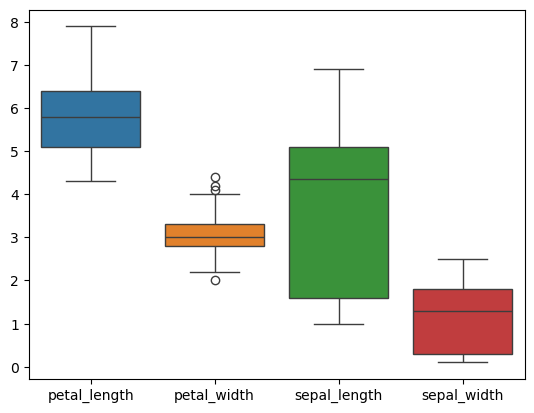

In [145]:
sns.boxplot(data=data)

In [147]:
def outlier(data,x):
    iqr=data[x].quantile(0.75)-data[x].quantile(0.25)
    min=data[x].quantile(0.25)-1.5*iqr
    max=data[x].quantile(0.75)+1.5*iqr
    data=data[(data[x]<max) & (data[x]>=min) ]
    return data

In [149]:
data=outlier(data,'petal_width')
data=outlier(data,'petal_length')
data=outlier(data,'sepal_width')
data=outlier(data,'sepal_length')

In [151]:
data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: >

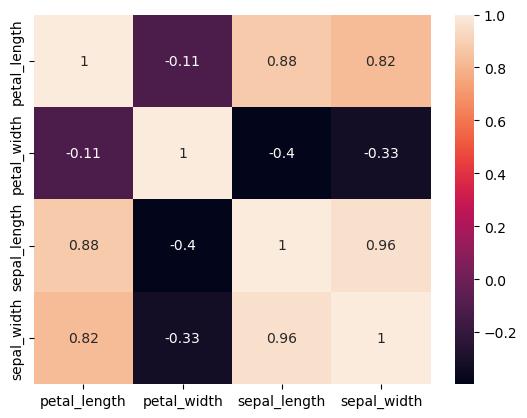

In [153]:
sns.heatmap(data.drop(['label'],axis=1).corr(),annot=True) 

In [155]:
X=data[['petal_width','petal_length','sepal_length']]
Y=data['label']

In [157]:
X=X.values

In [159]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [161]:
y_train.unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

<Axes: xlabel='label', ylabel='count'>

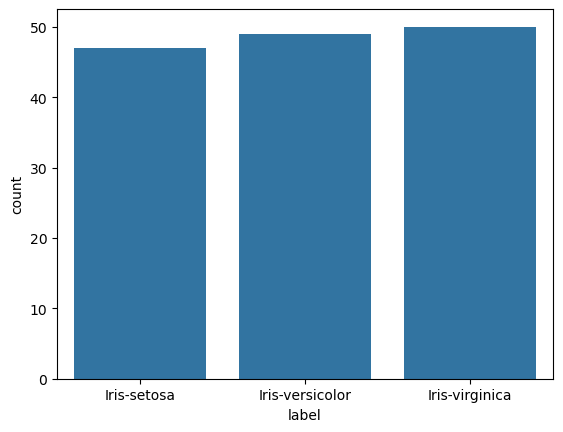

In [163]:
sns.countplot(x=data['label'])

In [165]:
#model 1 virginica
y_train1=y_train.map({'Iris-virginica':1,'Iris-versicolor':0, 'Iris-setosa':0})
y_test1=y_test.map({'Iris-virginica':1,'Iris-versicolor':0, 'Iris-setosa':0})

In [167]:
model1=linear_model.LogisticRegression()
model1.fit(x_train,y_train1.values)

LogisticRegression()

In [169]:
#model 2 Iris-versicolor
y_train2=y_train.map({'Iris-virginica':0,'Iris-versicolor':1, 'Iris-setosa':0})
y_test2=y_test.map({'Iris-virginica':0,'Iris-versicolor':1, 'Iris-setosa':0})

In [171]:
model2=linear_model.LogisticRegression()
model2.fit(x_train,y_train2.values)

LogisticRegression()

In [173]:
#model 3 Iris-setosa
y_train3=y_train.map({'Iris-virginica':0,'Iris-versicolor':0, 'Iris-setosa':1})
y_test3=y_test.map({'Iris-virginica':0,'Iris-versicolor':0, 'Iris-setosa':1})

In [175]:
model3=linear_model.LogisticRegression()
model3.fit(x_train,y_train3.values)

LogisticRegression()

In [177]:
model1.predict_proba(x_test)

array([[9.99975164e-01, 2.48363848e-05],
       [9.99963490e-01, 3.65096521e-05],
       [9.99983376e-01, 1.66244429e-05],
       [4.76375609e-01, 5.23624391e-01],
       [3.89310280e-01, 6.10689720e-01],
       [7.25858998e-01, 2.74141002e-01],
       [9.99968772e-01, 3.12284022e-05],
       [9.99953409e-01, 4.65910477e-05],
       [1.26668316e-01, 8.73331684e-01],
       [9.99977307e-01, 2.26931013e-05],
       [9.99966097e-01, 3.39026644e-05],
       [9.51521813e-01, 4.84781874e-02],
       [7.82121886e-02, 9.21787811e-01],
       [7.29069299e-01, 2.70930701e-01],
       [8.44629376e-01, 1.55370624e-01],
       [8.81389318e-01, 1.18610682e-01],
       [9.99982990e-01, 1.70095241e-05],
       [9.89534039e-01, 1.04659608e-02],
       [4.70441255e-02, 9.52955875e-01],
       [9.99975792e-01, 2.42080963e-05],
       [9.89768559e-01, 1.02314406e-02],
       [9.99987251e-01, 1.27494032e-05],
       [8.30003796e-02, 9.16999620e-01],
       [9.08374416e-01, 9.16255838e-02],
       [1.599479

In [179]:
model2.predict_proba(x_test)

array([[0.84770444, 0.15229556],
       [0.73196317, 0.26803683],
       [0.84872544, 0.15127456],
       [0.53814545, 0.46185455],
       [0.44820236, 0.55179764],
       [0.58795271, 0.41204729],
       [0.91750786, 0.08249214],
       [0.82071675, 0.17928325],
       [0.65045668, 0.34954332],
       [0.86884165, 0.13115835],
       [0.86793529, 0.13206471],
       [0.56270531, 0.43729469],
       [0.47804879, 0.52195121],
       [0.67337985, 0.32662015],
       [0.67371871, 0.32628129],
       [0.67946103, 0.32053897],
       [0.87001392, 0.12998608],
       [0.44758601, 0.55241399],
       [0.64064038, 0.35935962],
       [0.7011561 , 0.2988439 ],
       [0.40447064, 0.59552936],
       [0.87117726, 0.12882274],
       [0.72113227, 0.27886773],
       [0.68170586, 0.31829414],
       [0.79175658, 0.20824342],
       [0.87072844, 0.12927156],
       [0.65692712, 0.34307288],
       [0.55605415, 0.44394585],
       [0.37705708, 0.62294292],
       [0.83371021, 0.16628979],
       [0.

In [181]:
model3.predict_proba(x_test)

array([[3.29561168e-02, 9.67043883e-01],
       [5.41736453e-02, 9.45826355e-01],
       [2.95012371e-02, 9.70498763e-01],
       [9.97075986e-01, 2.92401391e-03],
       [9.97991156e-01, 2.00884359e-03],
       [9.94399361e-01, 5.60063853e-03],
       [3.31867769e-02, 9.66813223e-01],
       [5.83481613e-02, 9.41651839e-01],
       [9.99205678e-01, 7.94321598e-04],
       [3.45097879e-02, 9.65490212e-01],
       [3.85279318e-02, 9.61472068e-01],
       [9.60826416e-01, 3.91735843e-02],
       [9.99400128e-01, 5.99871542e-04],
       [9.86168981e-01, 1.38310194e-02],
       [9.90330605e-01, 9.66939515e-03],
       [9.74072643e-01, 2.59273571e-02],
       [2.59730322e-02, 9.74026968e-01],
       [8.14197988e-01, 1.85802012e-01],
       [9.99781454e-01, 2.18546320e-04],
       [2.62719432e-02, 9.73728057e-01],
       [8.33206390e-01, 1.66793610e-01],
       [1.95053681e-02, 9.80494632e-01],
       [9.99547121e-01, 4.52879047e-04],
       [9.65550369e-01, 3.44496313e-02],
       [9.984051

In [183]:
def predict_class(m1,m2,m3,x_test):
    l=[]
    for i in range(len(x_test)):
        c=max(m1.predict_proba(x_test)[i,1],m2.predict_proba(x_test)[i,1],m3.predict_proba(x_test)[i,1])
        if(c==m1.predict_proba(x_test)[i,1]):
            l.append('Iris-virginica')
        elif(c==m2.predict_proba(x_test)[i,1]):
            l.append('Iris-versicolor')
        else:
            l.append('Iris-setosa')
    return l

In [185]:
y_predict=predict_class(model1,model2,model3,x_test)
y_predict

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica']

In [187]:
accuracy_score(y_test,y_predict)

0.9545454545454546

In [ ]:
from sklearn.multiclass import OneVsRestClassifier as ovr
model_base = linear_model.LogisticRegression()
model_ovr=ovr(model_base)
model_ovr.fit(x_train,y_train)
# Prédiction
y_pred_ovr = model_ovr.predict(x_test)
# Évaluation
print(accuracy_score(y_test, y_pred_ovr))

0.9545454545454546


C:\Users\trabe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
